In [1]:
%matplotlib notebook
import sys
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, ccf, pacf
from statsmodels.tsa.stattools import acovf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import ccf
from matplotlib import pyplot as plt

In [2]:
sys.path.append('..')

In [3]:
from wealth_optimizer.bootstrap import generate_stationary_bootstrap_path
from wealth_optimizer.optimal_window_selection import get_optimal_block_size_stationary_bootstrap
from wealth_optimizer.optimal_window_selection import get_optimal_block_size_circular_bootstrap

In [4]:
import statsmodels.api as sm
arparams = np.array([0.45])
maparams = np.array([])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
ts = sm.tsa.arma_generate_sample(ar, ma, 1000)


<IPython.core.display.Javascript object>


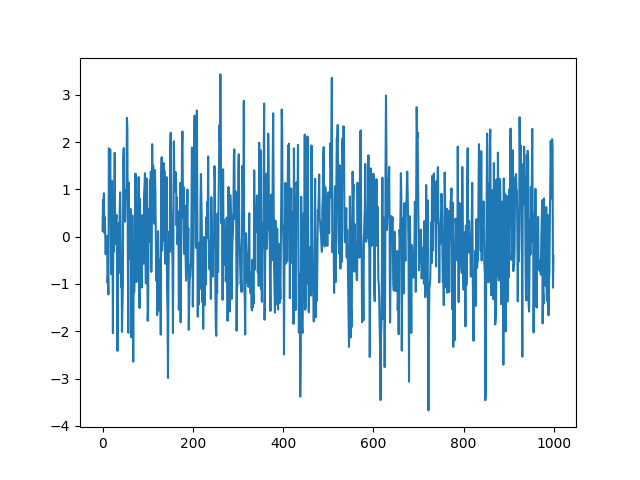

In [5]:
plt.plot(ts)

In [ ]:
auto_correlations = ACF(ts, nlags=20)

In [ ]:
plt.figure()
plt.bar(x=range(len(auto_correlations)), height=auto_correlations)
plt.show()

<IPython.core.display.Javascript object>


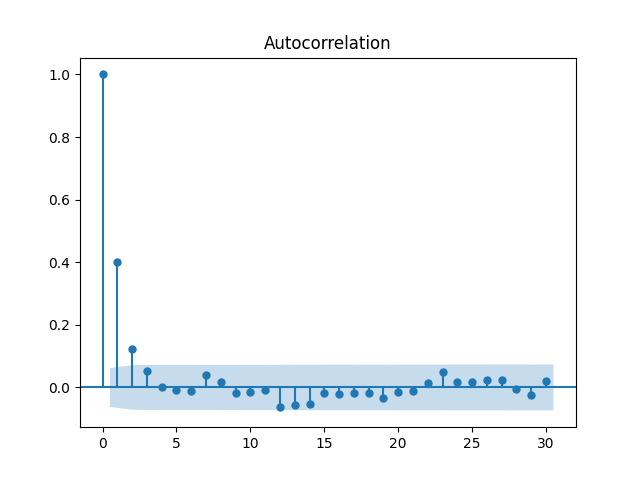

In [6]:
acf_fig = plot_acf(ts)
plt.show()

<IPython.core.display.Javascript object>


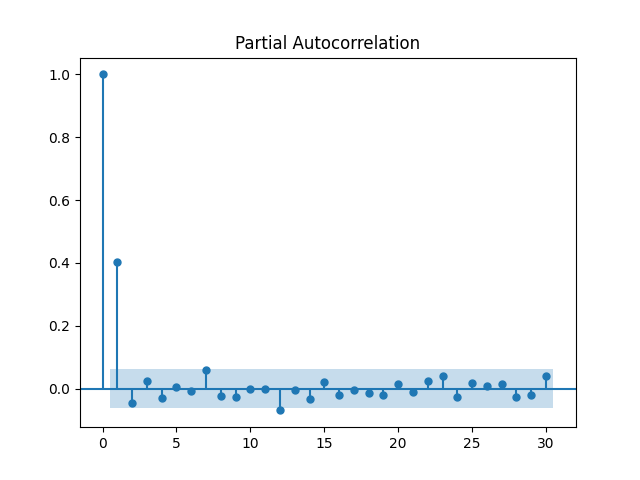

In [7]:
pacf_fig = plot_pacf(ts)
plt.show()

In [8]:
acf_fig.savefig('acf_ar_fig.png')
pacf_fig.savefig('pacf_ar_fig.png')

In [9]:
len(ts)

1000

In [10]:
get_optimal_block_size_stationary_bootstrap(ts)

120

In [11]:
get_optimal_block_size_circular_bootstrap(ts)

137

In [12]:
num_paths = 5000
paths = []  # list of numpy arrays
acfs = []
pacfs = []

In [13]:
raw_data = pd.DataFrame(ts)

In [14]:
for i in range(num_paths):
    if i % 100 == 0:
        print('path', i)
    path = generate_stationary_bootstrap_path(raw_data, expected_block_size = 120, n_req=500)
    auto_corrs = acf(path, nlags=20)
    partial_auto_corrs = pacf(path, nlags=20)
    paths.append(path)
    acfs.append(auto_corrs)
    pacfs.append(partial_auto_corrs)

path 0


C:\Users\Vesko\anaconda3\envs\thesis\lib\site-packages\statsmodels\tsa\stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


path 100
path 200
path 300
path 400
path 500
path 600
path 700
path 800
path 900
path 1000
path 1100
path 1200
path 1300
path 1400
path 1500
path 1600
path 1700
path 1800
path 1900
path 2000
path 2100
path 2200
path 2300
path 2400
path 2500
path 2600
path 2700
path 2800
path 2900
path 3000
path 3100
path 3200
path 3300
path 3400
path 3500
path 3600
path 3700
path 3800
path 3900
path 4000
path 4100
path 4200
path 4300
path 4400
path 4500
path 4600
path 4700
path 4800
path 4900


In [15]:
average_acfs = []
average_pacfs = []
lags = []

In [16]:
for lag in range(20):
    lags.append(lag)
    average_acfs.append(np.mean([x[lag] for x in acfs]))
    average_pacfs.append(np.mean([x[lag] for x in pacfs]))

<IPython.core.display.Javascript object>


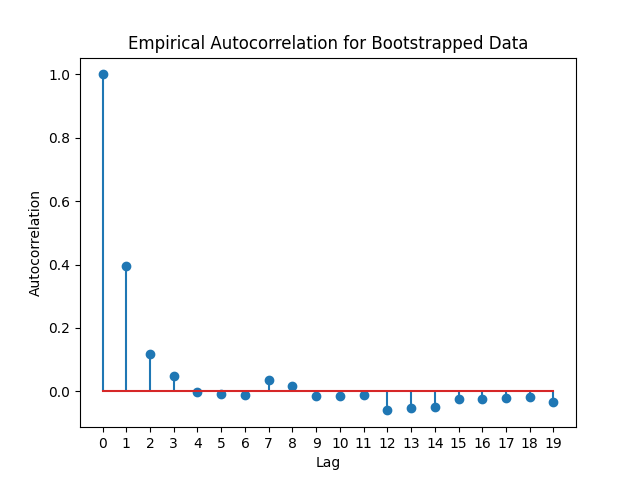

In [17]:
fig1, ax = plt.subplots()
# plt.plot(lags, average_acfs, marker='o', linestyle='None')
plt.stem(lags, average_acfs) #, marker='o', linestyle='None')
plt.title('Empirical Autocorrelation for Bootstrapped Data')
plt.xlabel('Lag')
ax.set_xticks(lags, minor=False)
plt.ylabel('Autocorrelation')
fig1.savefig('sb_acf_ar_fig.png')

<IPython.core.display.Javascript object>


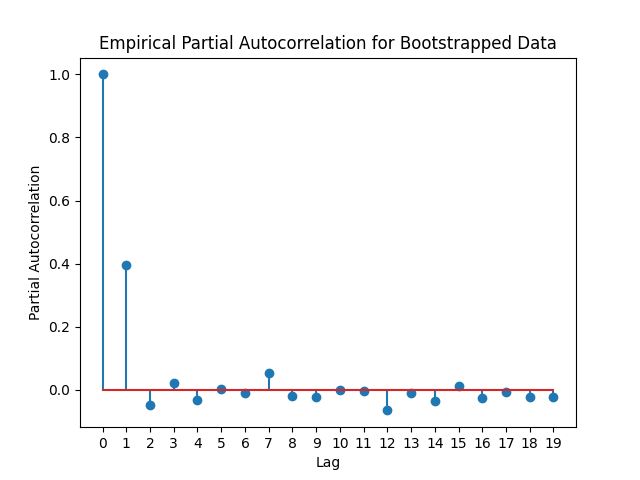

In [18]:
fig2, ax = plt.subplots()
# plt.plot(lags, average_acfs, marker='o', linestyle='None')
plt.stem(lags, average_pacfs) #, marker='o', linestyle='None')
plt.title('Empirical Partial Autocorrelation for Bootstrapped Data')
plt.xlabel('Lag')
ax.set_xticks(lags, minor=False)
plt.ylabel('Partial Autocorrelation')
fig2.savefig('sb_pacf_ar_fig.png')